In [3]:
#Imports
from math import *
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

#Matplotlib settings
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

sns.set(font_scale=2.0)
sns.set_style("darkgrid")
sns.set_palette(palette='deep')
sns.set_color_codes(palette='deep')

#Import custom modules
from physics import *

%matplotlib notebook

/home/drake/.anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Functions for determining the background and true signal

In [4]:
def Background(data,interval):
    """Calculates the background of a data set given an interval over which there is no true signal"""
    return np.mean(np.mean(data[:,interval[0]:interval[1]],axis=0))

def Signal(data,interval):
    """Calculates the true signal by subtracting the background"""
    return data - Background(data,interval)

def AverageSignal(data,interval):
    """Calculates the average signal"""
    return np.mean(Signal(data,interval),axis=0)

def Radius(KE):
    """Returns radius of electron orbit in m given KE in keV"""
    return me*c/(q*B0)*np.sqrt((KE*1000*q/(me*c**2)+1)**2-1)

def zfcalc(KE,y):
    """Returns the z-position at the screen in inches given the KE in keV and the distance between the 
    electron injection position and the screen (y) in m"""
    R = Radius(KE)
    return np.sqrt(R**2 - (y-R)**2)

def zfcalcGeneral(KE,yM,y):
    """Returns the z-position at the screen in inches given the KE in keV, and the distance between the 
    electron injection position and the screen (y) in m, and the magnet edge y-position yM in m"""
    R = Radius(KE)
    zM = zfcalc(KE,yM) #Final z-position of the electrons once they reach the magnet edge
    return zM + (y - yM)*(R - yM)/zM

def KEcalcGeneral(zf,yM,yf):
    """Returns KE in J given z-position of electrons, y-position of magnet edge, and y-position of screen, all in m"""
    a = (yM+yf)**2
    b = -2*yM*(yf*(yM+yf)+zf**2)
    d = yM**2*(zf**2+yf**2)
    f = (me*c)/(q*B0)
    g = (-b+np.sqrt(b**2-4*a*d))/(2*a)
    return me*c**2*(np.sqrt(g**2+f**2)/f - 1)

## Load in the data

In [5]:
filepath1MeV = './ND_Data/Yoke_1MeV_10ms/traces.csv'
data1MeV = np.genfromtxt(filepath1MeV, delimiter=',')

filepath2MeV = './ND_Data/Yoke_2MeV_0.58nA_4ms_003/traces.csv'
data2MeV = np.genfromtxt(filepath2MeV, delimiter=',')

filepath2p5MeV = './ND_Data/Yoke_2.5MeV_2ms/traces.csv'
data2p5MeV = np.genfromtxt(filepath2p5MeV, delimiter=',')

## Determine signal from data

In [6]:
interval = (0,100) #there appears to be no signal over this interval
Signal1MeV = Signal(data1MeV,interval)
AverageSignal1MeV = AverageSignal(data1MeV,interval)

Signal2MeV = Signal(data2MeV,interval)
AverageSignal2MeV = AverageSignal(data2MeV,interval)

Signal2p5MeV = Signal(data2p5MeV,interval)
AverageSignal2p5MeV = AverageSignal(data2p5MeV,interval)

## Mesh plot of signal

In [7]:
fig1 = plt.figure(figsize=(12,8))
ax1 = fig1.add_subplot(111)
ax1.set_xlim(0,3648)
ax1.set_xlabel('Pixel')
ax1.set_ylabel('Instance')


mesh1 = ax1.pcolormesh(Signal1MeV, cmap='viridis',vmin=0, vmax=np.max(Signal1MeV))
colorbar = fig1.colorbar(mesh1)
colorbar.set_label('Pixel Value')
plt.show()

<IPython.core.display.Javascript object>

## Plot of average signals at each energy

In [8]:
plt.figure()
plt.plot(AverageSignal1MeV,label='1.0 MeV')
plt.plot(AverageSignal2MeV,label='2.0 MeV')
plt.plot(AverageSignal2p5MeV,label='2.5 MeV')
plt.xlim(0,3648)
plt.ylim(0)
plt.xlabel('Pixel')
plt.ylabel('Pixel Value')
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

## Integrate over the signals at each energy

In [9]:
Integral1MeV = np.sum(AverageSignal1MeV[1200:2000])
Integral2MeV = np.sum(AverageSignal2MeV[1000:2000])
Integral2p5MeV = np.sum(AverageSignal2p5MeV[1000:2000])
print('1 MeV integral =',Integral1MeV)
print('2 MeV integral =',Integral2MeV)
print('2.5 MeV integral =',Integral2p5MeV)

1 MeV integral = 16574349.3633
2 MeV integral = 1482317.91333
2.5 MeV integral = 8959710.78


## Energy calibration

In [10]:
filepath1MeV = './ND_Data/Yoke_1MeV_10ms/traces.csv'
Data1MeV = np.genfromtxt(filepath1MeV, delimiter=',')

filepath1p8MeV = './ND_Data/Yoke_1.8MeV_10ms/traces.csv'
Data1p8MeV = np.genfromtxt(filepath1p8MeV, delimiter=',')

filepath2MeV = './ND_Data/Yoke_2MeV_0.58nA_4ms_003/traces.csv'
Data2MeV = np.genfromtxt(filepath2MeV, delimiter=',')

filepath2p5MeV = './ND_Data/Yoke_2.5MeV_2ms/traces.csv'
Data2p5MeV = np.genfromtxt(filepath2p5MeV, delimiter=',')

interval1MeV = (3000,3500) #there appears to be no signal over this interval
interval1p8MeV = (0,500)
interval2MeV = (0,500)
interval2p5MeV = (0,500)

Signal1MeV = Signal(Data1MeV,interval)
AverageSignal1MeV = AverageSignal(Data1MeV,interval1MeV)

Signal1p8MeV = Signal(Data1p8MeV,interval)
AverageSignal1p8MeV = AverageSignal(Data1p8MeV,interval1p8MeV)

Signal2MeV = Signal(Data2MeV,interval)
AverageSignal2MeV = AverageSignal(Data2MeV,interval2MeV)

Signal2p5MeV = Signal(Data2p5MeV,interval)
AverageSignal2p5MeV = AverageSignal(Data2p5MeV,interval2p5MeV)

In [11]:
fig2 = plt.figure(figsize=(12,8))
ax1 = fig2.add_subplot(111)
ax1.set_xlim(0,3648)
ax1.set_xlabel('Pixel')
ax1.set_ylabel('Instance')


mesh = ax1.pcolormesh(Signal1MeV, cmap='viridis',vmin=0, vmax=np.max(Signal1MeV))
colorbar = fig2.colorbar(mesh)
colorbar.set_label('Pixel Value')
plt.show()

<IPython.core.display.Javascript object>

In [12]:
B0 = 2136.0
yM = 0.5 #magnet edge position in inches
r0 = [0,-12.7,-12.7] #initial position in mm
CCDpos = 3.02 #CCD y-position relative to magnet edge in mm
HoleSep = 0.16 #Separation between holes in inches

#Convert to base units
B0 = B0/10**4
yM = yM*0.0254
r0 = np.multiply(r0,10**-3)
CCDpos = CCDpos*10**-3
HoleSep *= 0.0254
yf = yM + CCDpos

zfinalTheory1MeV = zfcalcGeneral(1000,-r0[1], -r0[1]+CCDpos)*10**3
zfinalTheoryPixels1MeV = (zfinalTheory1MeV - 9.5)*1000/8

zfinalTheory1p8MeV = (zfcalcGeneral(1800,-r0[1], -r0[1]+CCDpos) - 3*HoleSep)*10**3
zfinalTheoryPixels1p8MeV = (zfinalTheory1p8MeV - 9.5)*1000/8

zfinalTheory2MeV = zfcalcGeneral(2000,-r0[1], -r0[1]+CCDpos)*10**3
zfinalTheoryPixels2MeV = (zfinalTheory2MeV - 9.5)*1000/8

zfinalTheory2p5MeV = (zfcalcGeneral(2500,-r0[1], -r0[1]+CCDpos) - 3*HoleSep)*10**3
zfinalTheoryPixels2p5MeV = (zfinalTheory2p5MeV - 9.5)*1000/8

In [13]:
pixels = np.arange(3648)
position = pixels*8/1000 + 9.5
EnergyTheory = KEcalcGeneral(np.multiply(position,10**-3),yM,yf)/(10**6*q)
EnergyCalibration = np.vstack((pixels,EnergyTheory))
np.savetxt('Energy_Calibration_2136Gauss.csv',np.transpose(EnergyCalibration),delimiter=',')

<IPython.core.display.Javascript object>


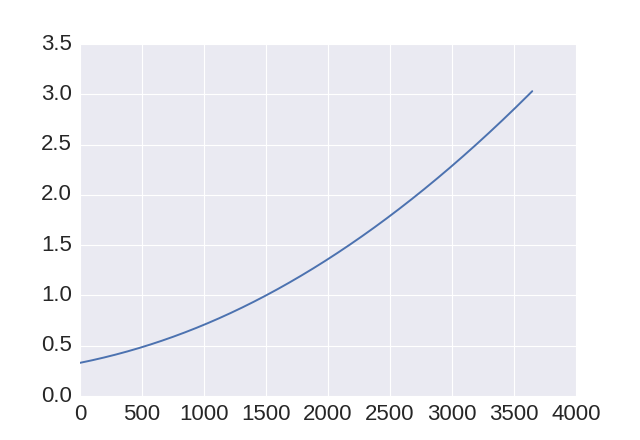

In [14]:
plt.figure()
plt.plot(pixels,EnergyTheory)

<IPython.core.display.Javascript object>


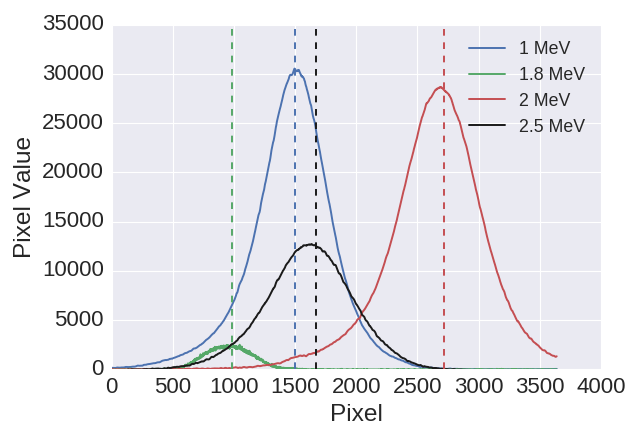

Predicted 1 MeV location: 1500.0
Actual 1 MeV location: 1498
Error: 0.133511348465 %


Predicted 1.8 MeV location: 986.0
Actual 1.8 MeV location: 983
Error: 0.30518819939 %


Predicted 2MeV location: 2718.0
Actual 2MeV location: 2689
Error: 1.07846783191 %


Predicted 2.5 MeV location: 1671.0
Actual 2.5 MeV location: 1634
Error: 2.26438188494 %


In [15]:
SmoothedSignal1MeV = savitzky_golay(AverageSignal1MeV,window_size=51,order=5)
SmoothedSignal1p8MeV = savitzky_golay(AverageSignal1p8MeV,window_size=51,order=5)
SmoothedSignal2MeV = savitzky_golay(AverageSignal2MeV,window_size=51,order=5)
SmoothedSignal2p5MeV = savitzky_golay(AverageSignal2p5MeV,window_size=51,order=5)

fig3 = plt.figure()
plt.plot(SmoothedSignal1MeV,label='1 MeV',color='b')
plt.plot(AverageSignal1p8MeV,label='1.8 MeV',color='g')
plt.plot(SmoothedSignal2MeV,label='2 MeV',color='r')
plt.plot(SmoothedSignal2p5MeV,label='2.5 MeV',color='k')
plt.axvline(zfinalTheoryPixels1MeV,color='b',linestyle='--')
plt.axvline(zfinalTheoryPixels1p8MeV,color='g',linestyle='--')
plt.axvline(zfinalTheoryPixels2MeV,color='r',linestyle='--')
plt.axvline(zfinalTheoryPixels2p5MeV,color='k',linestyle='--')
plt.ylim(0)
plt.xlabel('Pixel')
plt.ylabel('Pixel Value')
plt.legend(loc=1,fontsize=16)
plt.tight_layout()

zfinalExpPixels1MeV = np.argmax(SmoothedSignal1MeV)
zfinalExpPixels1p8MeV = np.argmax(SmoothedSignal1p8MeV)
zfinalExpPixels2MeV = np.argmax(SmoothedSignal2MeV)
zfinalExpPixels2p5MeV = np.argmax(SmoothedSignal2p5MeV)

print('Predicted 1 MeV location:',round(zfinalTheoryPixels1MeV))
print('Actual 1 MeV location:',zfinalExpPixels1MeV)
print('Error:',abs(round(zfinalTheoryPixels1MeV)-zfinalExpPixels1MeV)/zfinalExpPixels1MeV*100,'%')
print('\n')

print('Predicted 1.8 MeV location:',round(zfinalTheoryPixels1p8MeV))
print('Actual 1.8 MeV location:',zfinalExpPixels1p8MeV)
print('Error:',abs(round(zfinalTheoryPixels1p8MeV)-zfinalExpPixels1p8MeV)/zfinalExpPixels1p8MeV*100,'%')
print('\n')

print('Predicted 2MeV location:',round(zfinalTheoryPixels2MeV))
print('Actual 2MeV location:',zfinalExpPixels2MeV)
print('Error:',abs(round(zfinalTheoryPixels2MeV)-zfinalExpPixels2MeV)/zfinalExpPixels2MeV*100,'%')
print('\n')

print('Predicted 2.5 MeV location:',round(zfinalTheoryPixels2p5MeV))
print('Actual 2.5 MeV location:',zfinalExpPixels2p5MeV)
print('Error:',abs(round(zfinalTheoryPixels2p5MeV)-zfinalExpPixels2p5MeV)/zfinalExpPixels2p5MeV*100,'%')
plt.savefig('Energy calibration comparison with experiment (adjusted for varying CCD position).svg')

## Current calibration

In [16]:
# filepath1MeV_560pA = './ND_Data/NoYoke_1MeV_0.58nA_0.5ms/traces.csv'
# Data1MeV_560pA = np.genfromtxt(filepath1MeV_560pA, delimiter=',')
# interval = (0,100) #there appears to be no signal over this interval
# Signal1MeV_560pA = Signal(Data1MeV_560pA,interval)
# AverageSignal1MeV_560pA = AverageSignal(Data1MeV_560pA,interval)

filepath2MeV_390pA = './ND_Data/Yoke_2MeV_0.58nA_10ms/traces.csv'
Data2MeV_390pA = np.genfromtxt(filepath2MeV_390pA, delimiter=',')
interval = (0,100) #there appears to be no signal over this interval
Signal2MeV_390pA = Signal(Data2MeV_390pA,interval)
AverageSignal2MeV_390pA = AverageSignal(Data2MeV_390pA,interval)

filepath2MeV_760pA = './ND_Data/Yoke_2MeV_0.95nA_0.1ms/traces.csv'
Data2MeV_760pA = np.genfromtxt(filepath2MeV_760pA, delimiter=',')
interval = (0,100) #there appears to be no signal over this interval
Signal2MeV_760pA = Signal(Data2MeV_760pA,interval)
AverageSignal2MeV_760pA = AverageSignal(Data2MeV_760pA,interval)

<IPython.core.display.Javascript object>


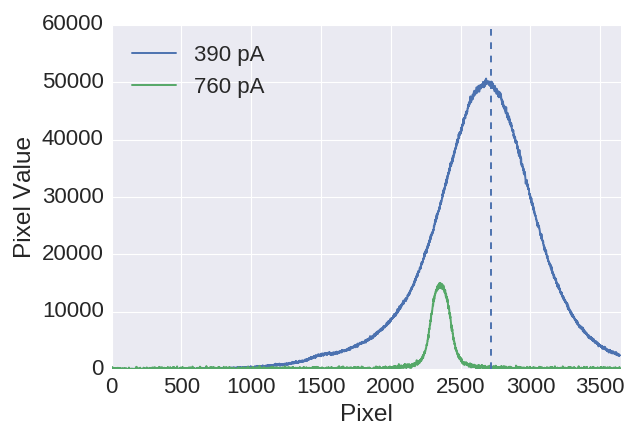

In [17]:
plt.figure()
plt.plot(AverageSignal2MeV_390pA,label='390 pA')
plt.plot(AverageSignal2MeV_760pA,label='760 pA')
plt.axvline(zfinalTheoryPixels2MeV,linestyle='--')
plt.xlim(0,3648)
plt.ylim(0)
plt.xlabel('Pixel')
plt.ylabel('Pixel Value')
plt.legend(loc=2)
plt.tight_layout()